In [1]:
# imoport libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import NMF
import pickle
from fuzzywuzzy import process

In [115]:
#!pip install python-Levenshtein

     |████████████████████████████████| 50 kB 2.1 MB/s eta 0:00:01
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-macosx_10_9_x86_64.whl size=80807 sha256=901e3f724393f71eab0605b930696bb997626a3f1b962dcb0bd1e485e911661f
  Stored in directory: /Users/alexandros.samartzis/Library/Caches/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [2]:
# import the data set of movie ratings 
df = pd.read_csv('../data/ml-latest-small/ratings.csv', na_values = 'Nan')

In [3]:
df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [4]:
# use pivot to make the matrix of movie rates
rates =df.pivot(index='userId',columns = 'movieId')
rates.head()

rating                                                                 \
movieId 1      2      3      4      5      6      7      8      9      10       
userId                                                                          
1          4.0    NaN    4.0    NaN    NaN    4.0    NaN    NaN    NaN    NaN   
2          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5          4.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

         ... timestamp                                                   \
movieId  ...    193565 193567 193571 193573 193579 193581 193583 193585   
userId   ...                                                              
1        ...       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2        ...       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3        ...       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4        ...       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5        ...       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                       
movieId 193587 193609  
userId                 
1          NaN    NaN  
2          NaN    NaN  
3          NaN    NaN  
4          NaN    NaN  
5          NaN    NaN  

[5 rows x 19448 columns]

In [5]:
rates.rating

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# import the data set of movie names
df_movie = pd.read_csv('../data/ml-latest-small/movies.csv', na_values = 'Nan')

In [7]:
df_movie.title

0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object

In [8]:
# Split the movie name from movie year and apply it in the matrix
df_movie['year'] = df_movie.title.astype(str).str[-6:]
df_movie['title_new'] = df_movie.title.astype(str).str[:-6]

In [9]:
df_movie

,movieId,title,genres,year,title_new
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995),Toy Story
1,2,Jumanji (1995),Adventure|Children|Fantasy,(1995),Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,(1995),Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,(1995),Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,(1995),Father of the Bride Part II
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,(2017),Black Butler: Book of the Atlantic
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,(2017),No Game No Life: Zero
9739,193585,Flint (2017),Drama,(2017),Flint
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,(2018),Bungo Stray Dogs: Dead Apple


In [10]:
# Try to zip columns with movie names
#new_columns = dict(zip(df.movieId,df_movie.title))
rates.rename(columns=dict(zip(df_movie["movieId"], df_movie["title_new"])),inplace = True)
rates.head()

rating                                                \
movieId Toy Story  Jumanji  Grumpier Old Men  Waiting to Exhale    
userId                                                             
1              4.0      NaN               4.0                NaN   
2              NaN      NaN               NaN                NaN   
3              NaN      NaN               NaN                NaN   
4              NaN      NaN               NaN                NaN   
5              4.0      NaN               NaN                NaN   

                                                                   \
movieId Father of the Bride Part II  Heat  Sabrina  Tom and Huck    
userId                                                              
1                                NaN   4.0      NaN           NaN   
2                                NaN   NaN      NaN           NaN   
3                                NaN   NaN      NaN           NaN   
4                                NaN   NaN      NaN           NaN   
5                                NaN   NaN      NaN           NaN   

                                  ...           timestamp  \
movieId Sudden Death  GoldenEye   ... Gintama: The Movie    
userId                            ...                       
1                 NaN        NaN  ...                 NaN   
2                 NaN        NaN  ...                 NaN   
3                 NaN        NaN  ...                 NaN   
4                 NaN        NaN  ...                 NaN   
5                 NaN        NaN  ...                 NaN   

                                                                        \
movieId anohana: The Flower We Saw That Day - The Movie  Silver Spoon    
userId                                                                   
1                                                    NaN           NaN   
2                                                    NaN           NaN   
3                                                    NaN           NaN   
4                                                    NaN           NaN   
5                                                    NaN           NaN   

                                                                              \
movieId Love Live! The School Idol Movie  Jon Stewart Has Left the Building    
userId                                                                         
1                                     NaN                                NaN   
2                                     NaN                                NaN   
3                                     NaN                                NaN   
4                                     NaN                                NaN   
5                                     NaN                                NaN   

                                                                           \
movieId Black Butler: Book of the Atlantic  No Game No Life: Zero  Flint    
userId                                                                      
1                                       NaN                    NaN    NaN   
2                                       NaN                    NaN    NaN   
3                                       NaN                    NaN    NaN   
4                                       NaN                    NaN    NaN   
5                                       NaN                    NaN    NaN   

                                                                     
movieId Bungo Stray Dogs: Dead Apple  Andrew Dice Clay: Dice Rules   
userId                                                               
1                                 NaN                           NaN  
2                                 NaN                           NaN  
3                                 NaN                           NaN  
4                                 NaN                           NaN  
5                                 NaN                           NaN  

[5 rows x 194

In [104]:
rate_movies =  rates.rating

In [12]:
# Deal with the NaN values in the ratings
imputer = SimpleImputer(strategy = 'mean') # add the NaN with the average of movie recommendations 
Rtrue = imputer.fit_transform(rate_movies)
Rtrue

array([[4.        , 3.43181818, 4.        , ..., 3.5       , 3.5       ,
        4.        ],
       [3.92093023, 3.43181818, 3.25961538, ..., 3.5       , 3.5       ,
        4.        ],
       [3.92093023, 3.43181818, 3.25961538, ..., 3.5       , 3.5       ,
        4.        ],
       ...,
       [2.5       , 2.        , 2.        , ..., 3.5       , 3.5       ,
        4.        ],
       [3.        , 3.43181818, 3.25961538, ..., 3.5       , 3.5       ,
        4.        ],
       [5.        , 3.43181818, 3.25961538, ..., 3.5       , 3.5       ,
        4.        ]])

# Model creation

In [ ]:
# Check first the ideal number of iterations for the model
error = []
for i in np.arange(500,800,100):
    print(i)
    model = NMF(n_components=2, max_iter= i)  # n_components is the number of features selected. Frot eh example in the class the n_components is 2
    model.fit(Rtrue)
    Q = model.components_
    Q_df = pd.DataFrame(model.components_, columns=rate_movies.columns)
    P = model.transform(Rtrue)
    P_df = pd.DataFrame(P,  index=rate_movies.index)
    error.append(model.reconstruction_err_)
error


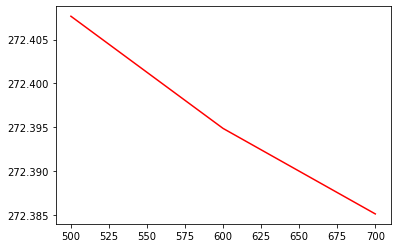

[272.40766649287184, 272.3948652597801, 272.38511180892203]


In [104]:
x = np.arange(500,800,100)
plt.plot(x, error, color ="red")
plt.show()
print(error)

- The more we increase the iterations, we decrease the error, but not drasticaly. We chose an itteration of 500 since it balances the time and the error value

In [105]:
# Check the number of n_components for the model
error = []
for i in np.arange(2,8):
    print(i)
    model = NMF(n_components=i, max_iter= 500)  # n_components is the number of features selected. Frot eh example in the class the n_components is 2
    model.fit(Rtrue)
    Q = model.components_
    Q_df = pd.DataFrame(model.components_, columns=rate_movies.columns)
    P = model.transform(Rtrue)
    P_df = pd.DataFrame(P,  index=rate_movies.index)
    error.append(model.reconstruction_err_)
error

2


/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


3


/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


4


/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


5


/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


6


/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


7


/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


[272.40766652409195,
 269.7373951633315,
 267.29674244930686,
 264.63114256863815,
 262.75296872364726,
 260.81453087698594]

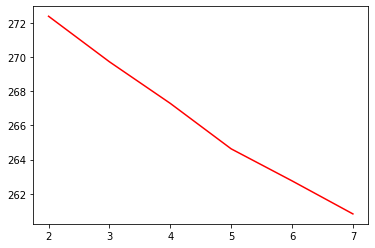

[272.40766652409195, 269.7373951633315, 267.29674244930686, 264.63114256863815, 262.75296872364726, 260.81453087698594]


In [106]:
x = np.arange(2,8)
plt.plot(x, error, color ="red")
plt.show()
print(error)

- without a lot of research go to the next step and go back to that later

In [ ]:
# Check the number of n_components for the model
error = []
for i in np.arange(2,8):
    print(i)
    model = NMF(n_components=i, max_iter= 500)  # n_components is the number of features selected. Frot eh example in the class the n_components is 2
    model.fit(Rtrue)
    Q = model.components_
    Q_df = pd.DataFrame(model.components_, columns=rate_movies.columns)
    P = model.transform(Rtrue)
    P_df = pd.DataFrame(P,  index=rate_movies.index)
    error.append(model.reconstruction_err_)
error

# Continue with the model

In [ ]:
model5 = NMF(n_components=5, max_iter= 500)  # n_components is the number of features selected. Frot eh example in the class the n_components is 2
model5.fit(Rtrue)
Q = model5.components_
Q_df = pd.DataFrame(model5.components_, columns=rate_movies.columns)
P = model5.transform(Rtrue)
P_df = pd.DataFrame(P,  index=rate_movies.index)
model5.reconstruction_err_

- save the model


In [16]:
##########################
# SAVE-LOAD using pickle #
##########################
# save
#with open('model5.pkl','wb') as f:
#    pickle.dump(model5,f)

# load
with open('model5.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [17]:
print(clf2)

NMF(max_iter=500, n_components=5)


# Create the functions

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
# import the data set of movie ratings 
df = pd.read_csv('../data/ml-latest-small/ratings.csv', na_values = 'Nan')
# use pivot to make the matrix of movie rates
rates =df.pivot(index='userId',columns = 'movieId')
rates.head()
rates.rating
# import the data set of movie names
df_movie = pd.read_csv('../data/ml-latest-small/movies.csv', na_values = 'Nan')
df_movie.title
# Split the movie name from movie year and apply it in the matrix
df_movie['year'] = df_movie.title.astype(str).str[-6:]
df_movie['title_new'] = df_movie.title.astype(str).str[:-6]
df_movie
# Try to zip columns with movie names
#new_columns = dict(zip(df.movieId,df_movie.title))
rates.rename(columns=dict(zip(df_movie["movieId"], df_movie["title_new"])),inplace = True)
rates.rating

movieId,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Sabrina,Tom and Huck,Sudden Death,GoldenEye,...,Gintama: The Movie,anohana: The Flower We Saw That Day - The Movie,Silver Spoon,Love Live! The School Idol Movie,Jon Stewart Has Left the Building,Black Butler: Book of the Atlantic,No Game No Life: Zero,Flint,Bungo Stray Dogs: Dead Apple,Andrew Dice Clay: Dice Rules
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
# TODO: make a frame zipping ratings with user id and title
umrT = pd.read_csv('../data/ml-latest-small/ratings.csv', na_values = 'Nan')
mtg = pd.read_csv('../data/ml-latest-small/movies.csv', na_values = 'Nan')
# merge the two frames based on the column movieid
movies = pd.merge(umrT, mtg, on='movieId')
movies['title'].unique().tolist()


['Toy Story (1995)',
 'Grumpier Old Men (1995)',
 'Heat (1995)',
 'Seven (a.k.a. Se7en) (1995)',
 'Usual Suspects, The (1995)',
 'From Dusk Till Dawn (1996)',
 'Bottle Rocket (1996)',
 'Braveheart (1995)',
 'Rob Roy (1995)',
 'Canadian Bacon (1995)',
 'Desperado (1995)',
 'Billy Madison (1995)',
 'Clerks (1994)',
 'Dumb & Dumber (Dumb and Dumber) (1994)',
 'Ed Wood (1994)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Pulp Fiction (1994)',
 'Stargate (1994)',
 'Tommy Boy (1995)',
 'Clear and Present Danger (1994)',
 'Forrest Gump (1994)',
 'Jungle Book, The (1994)',
 'Mask, The (1994)',
 'Blown Away (1994)',
 'Dazed and Confused (1993)',
 'Fugitive, The (1993)',
 'Jurassic Park (1993)',
 'Mrs. Doubtfire (1993)',
 "Schindler's List (1993)",
 'So I Married an Axe Murderer (1993)',
 'Three Musketeers, The (1993)',
 'Tombstone (1993)',
 'Dances with Wolves (1990)',
 'Batman (1989)',
 'Silence of the Lambs, The (1991)',
 'Pinocchio (1940)',
 'Fargo (1996)',
 'Mission: Impossible (1996)',

In [103]:
# TODO: make a frame zipping ratings with user id and title grouped by the 
umrT_av_rat = umrT.set_index('movieId').groupby(['movieId']).mean()
# merge the two frames based on the column movieid
movieId_rating = pd.merge(umrT_av_rat, mtg, on='movieId')
# merge movieID, userID, avg(rate), title, genres, accurate(rate)
mov = pd.merge(movieId_rating,movies, on='movieId', how = 'left')[["movieId", "rating_x","title_x","userId_y","genres_x","rating_y"]]
mov.columns = [["movieId", "rating_avg","title","userId","genres","rating_acc"]]
mov.head(5)


,movieId,rating_avg,title,userId,genres,rating_acc
0,1,3.92093,Toy Story (1995),1,Adventure|Animation|Children|Comedy|Fantasy,4.0
1,1,3.92093,Toy Story (1995),5,Adventure|Animation|Children|Comedy|Fantasy,4.0
2,1,3.92093,Toy Story (1995),7,Adventure|Animation|Children|Comedy|Fantasy,4.5
3,1,3.92093,Toy Story (1995),15,Adventure|Animation|Children|Comedy|Fantasy,2.5
4,1,3.92093,Toy Story (1995),17,Adventure|Animation|Children|Comedy|Fantasy,4.5


- define the function

In [116]:
def get_movie_frame(method = 'NMF', umrT=umrT, mtg = mtg):

    if method == 'NMF':
        """
        i will get a Data Frame with movieId Title and userId 
        pivoted in a matrix with NaN where user has no rating
        """
        # use pivot to make the matrix of movie rates
        rates =umrT.pivot(index='userId',columns = 'movieId')
        # Split the movie name from movie year and apply it in the matrix
        mtg['year'] = mtg.title.astype(str).str[-6:]
        mtg['title_new'] = mtg.title.astype(str).str[:-6]
        # Try to zip columns with movie names
        #new_columns = dict(zip(df.movieId,df_movie.title))
        rates.rename(columns=dict(zip(mtg["movieId"], mtg["title_new"])),inplace = True)
        movies = rates.rating
    elif method == 'user_similarity':
        """
        i will get a Data Frame with movieId Title average ratings for per user.
        Final outcome is a frame with columns:# 
        movieID, userID, avg(rate), title, genres, accurate(rate)
        """
        umrT_av_rat = umrT.set_index('movieId').groupby(['movieId']).mean()
        # merge the two frames based on the column movieid
        movies = pd.merge(umrT, mtg, on='movieId')
        # merge the two frames based on the column movieid to find average rating
        movieId_rating = pd.merge(umrT_av_rat, mtg, on='movieId')
        # merge movieID, userID, avg(rate), title, genres, accurate(rate)
        mov = pd.merge(movieId_rating,movies, on='movieId', how = 'left')[["movieId", "rating_x","title_x","userId_y","genres_x","rating_y"]]
        mov.columns = [["movieId", "rating_avg","title","userId","genres","rating_acc"]]
        # reset index
        movies = mov
    return movies
movies = get_movie_frame()
list(movies.columns)

['Toy Story ',
 'Jumanji ',
 'Grumpier Old Men ',
 'Waiting to Exhale ',
 'Father of the Bride Part II ',
 'Heat ',
 'Sabrina ',
 'Tom and Huck ',
 'Sudden Death ',
 'GoldenEye ',
 'American President, The ',
 'Dracula: Dead and Loving It ',
 'Balto ',
 'Nixon ',
 'Cutthroat Island ',
 'Casino ',
 'Sense and Sensibility ',
 'Four Rooms ',
 'Ace Ventura: When Nature Calls ',
 'Money Train ',
 'Get Shorty ',
 'Copycat ',
 'Assassins ',
 'Powder ',
 'Leaving Las Vegas ',
 'Othello ',
 'Now and Then ',
 'Persuasion ',
 'City of Lost Children, The (Cité des enfants perdus, La) ',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) ',
 'Dangerous Minds ',
 'Twelve Monkeys (a.k.a. 12 Monkeys) ',
 'Babe ',
 'Dead Man Walking ',
 'It Takes Two ',
 'Clueless ',
 'Cry, the Beloved Country ',
 'Richard III ',
 'Dead Presidents ',
 'Restoration ',
 'Mortal Kombat ',
 'To Die For ',
 'How to Make an American Quilt ',
 'Seven (a.k.a. Se7en) ',
 'Pocahontas ',
 'When Night Is Falling ',
 'Usual Suspects, 

In [113]:
def match_movie_title(input_title, movie_titles):
    """
    Matches inputed movie title to existing one in the list with fuzzywuzzy
    """
    matched_title = process.extractOne(input_title, movie_titles)[0]

    return matched_title

In [117]:
user_rating = {
    'the lion king': 5,
    'terminator': 5,
    'star wars': 2
}
user = pd.DataFrame(user_rating, index=[0])
user_t = user.T.reset_index()
# list of the entry movies
user_movie_entries = list(user_t["index"])
#list of the movie titles of library
movie_titles = list(movies.columns)
# matches the movies from user with the library
intended_movies = [match_movie_title(title, movie_titles) for title in user_movie_entries]
intended_movies

['Lion King, The ',
 'Terminator 2: Judgment Day ',
 'Star Wars: Episode IV - A New Hope ']

In [61]:

def recommend_with_NMF(movies= get_movie_frame() ,user_rating=user_rating, n=5):

    ##### add a new user with movies and ratings and NaN else #######

    # ------------------------------------------------------------ #

    # makes a frame for the external user ratings of the movies(features)
    user = pd.DataFrame(user_rating, index=[0])
    # rearrange the frame as movies and ratings two columns, movies and ratings
    user_t = user.T.reset_index()
    # list of the entry movies
    user_movie_entries = list(user_t["index"])
    # list of the movie titles of library
    movie_titles = list(movies.columns)
    # matches the movies from user with the library
    intended_movies = [match_movie_title(title, movie_titles) for title in user_movie_entries]
    # convert these movies to intended movies and convert them into movie ids
    recommend = movies.copy()
    recommend = recommend.reset_index()
    recommend = recommend.set_index("title")
    recommend.drop(intended_movies, inplace=True)

    # ------------------------------------------------------------#
    
    #  dEal with missing values with Imputer

    # ------------------------------------------------------------#
    
    # import appropriate model NMF from pickle

    # ------------------------------------------------------------#
    
    # take Q and P matrices

    # ------------------------------------------------------------#
    
    # locate new user and give an array of rates with Imputed values

    # ------------------------------------------------------------#
    
    # predict user P values

    # ------------------------------------------------------------#
    
    # remove seen movies

    # ------------------------------------------------------------#
    
    # give top n recommendations   * 
    return 'This is the NMF model'

recommend_with_NMF()



'This is the NMF model'

# Different tries!! To clean them!

In [141]:
# define function that imports data
# import the data set of movie ratings 
df = pd.read_csv('../data/ml-latest-small/ratings.csv', na_values = 'Nan')
df_movie = pd.read_csv('../data/ml-latest-small/movies.csv', na_values = 'Nan')
# use pivot to make the matrix of movie rates
rates =df.pivot(index='userId',columns = 'movieId')
# Split the movie name from movie year and apply it in the matrix
df_movie['year'] = df_movie.title.astype(str).str[-6:]
df_movie['title_new'] = df_movie.title.astype(str).str[:-6]
# Try to zip columns with movie names
#new_columns = dict(zip(df.movieId,df_movie.title))
rates.rename(columns=dict(zip(df_movie["movieId"], df_movie["title_new"])),inplace = True)
# final Frame that show ratings
rate_movies =  rates.rating
# Deal with the NaN values in the ratings
imputer = SimpleImputer(strategy = 'mean') # add the NaN with the average of movie recommendations 
Rtrue = imputer.fit_transform(rate_movies)
# array to feed the model
Rtrue



In [23]:
# load model
with open('model5.pkl', 'rb') as f:
    model5 = pickle.load(f)

- create new user and propose n different movies to rate

In [24]:
# create a frame with one 
user_new = pd.DataFrame(rate_movies.loc[1].copy())
user_new[1] = np.nan
rand_movies = user_new.sample(n=2,axis='index')
for idx, movies in enumerate(rand_movies.index):
    user_new.loc[rand_movies.index[idx]] = input(f'Give me the rating for the movie {movies}.')



In [25]:
user_new_transposed = user_new.T
rate_movies.append(user_new_transposed)
imputer = SimpleImputer(strategy = 'mean') # add the NaN with the average of movie recommendations 
R_new= imputer.fit_transform(rate_movies)
R_new#[-1]
#user_P = model.transform(user)          # how strongly our user likes the 2 "genres"
#Q = model5.components_
#user_R = np.dot(user_P,Q)
#recommendation = pd.DataFrame({'user_input':user[0], 'predicted_ratings':user_R[0]}, index = df.columns)

array([[4.        , 3.43181818, 4.        , ..., 3.5       , 3.5       ,
        4.        ],
       [3.92093023, 3.43181818, 3.25961538, ..., 3.5       , 3.5       ,
        4.        ],
       [3.92093023, 3.43181818, 3.25961538, ..., 3.5       , 3.5       ,
        4.        ],
       ...,
       [2.5       , 2.        , 2.        , ..., 3.5       , 3.5       ,
        4.        ],
       [3.        , 3.43181818, 3.25961538, ..., 3.5       , 3.5       ,
        4.        ],
       [5.        , 3.43181818, 3.25961538, ..., 3.5       , 3.5       ,
        4.        ]])

In [26]:
type(R_new)#[-1]

numpy.ndarray

In [28]:
def movie_recommendation(rate_movies=rate_movies, model = model5):
    # create a frame with one 
    user_new = pd.DataFrame(rate_movies.loc[1].copy())
    user_new[1] = np.nan
    rand_movies = user_new.sample(n=1,axis='index')
    for idx, movies in enumerate(rand_movies.index):
        user_new.loc[rand_movies.index[idx]] = input(f'Give me the rating for the movie {movies}.')
    user_new_transposed = user_new.T
    rate_movies.append(user_new_transposed)
    imputer = SimpleImputer(strategy = 'mean') # add the NaN with the average of movie recommendations 
    R_new= imputer.fit_transform(rate_movies)
    user = np.array(R_new[-1])
    user_P = model.transform(user)          # how strongly our user likes the 2 "genres"
    Q = model.components_
    # user_R = np.dot(user_P,Q)
    # recommendation = pd.DataFrame({'user_input':user[0], 'predicted_ratings':user_R[0]}, index = df.columns)
    # return recommendation
#recommendation = movie_recommendation()
# recommendation[recommendation['user_input'].isna()].sort_values(by = 'predicted_ratings', ascending= False).head(1)


In [ ]:
movie_recommendation()

In [5]:
# import the data set of movie names
df_movie = pd.read_csv('../data/ml-latest-small/movies.csv', na_values = 'Nan')
# Split the movie name from movie year and apply it in the matrix
df_movie['year'] = df_movie.title.astype(str).str[-6:]
df_movie['title_new'] = df_movie.title.astype(str).str[:-6]
selections = []

def movies_user_input():
    selection = []
    user_movies = []
    while selection != 'end':
        selection = input('Give me your top 5 movies.')
        selections.append(selection)
    for i in selections:
        user_movies.append(process.extractOne(str(i), df_movie.title_new))
    return selections[:-1]


In [6]:
selections = movies_user_input()

In [7]:
selections[:-1]

['Matrix The']

In [131]:
selections = ['THe Matrix','Redemption','Godfather']
user_movies = []
for i in selections:
    print(str(i))
    user_movies.append(process.extractOne(str(i), df_movie.title_new))

THe Matrix
Redemption
Godfather


In [138]:
user_movies[1]
df_movie.title_new[user_movies[1][2]]

'Shawshank Redemption, The '

In [ ]:
def recommend_random(movies, user_rating, k=5):
    """
    return k random unseen movies for user 
    """
    user = pd.DataFrame(user_rating, index=[0])
    user_t = user.T.reset_index()
    user_movie_entries = list(user_t["index"])
    movie_titles = list(movies["title"])
    intended_movies = [match_movie_title(title, movie_titles) for title in user_movie_entries]
    
    # convert these movies to intended movies and convert them into movie ids
    recommend = movies.copy()
    recommend = recommend.reset_index()
    recommend = recommend.set_index("title")
    recommend.drop(intended_movies, inplace=True)
    random_movies = np.random.choice(list(recommend.index), replace=False, size=k)
    return random_movies  